### 绘制等高线

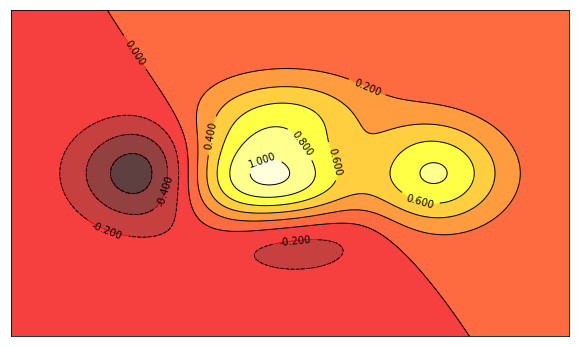

In [9]:
import matplotlib
import numpy as np
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

%matplotlib inline

# 定义等高线高度函数
def f(x, y):
    return (1 - x / 2 + x ** 5 + y ** 3) * np.exp(- x ** 2 - y ** 2)

# 数据数目
n = 256
# 定义x, y
x = np.linspace(-3, 3, n)
y = np.linspace(-3, 3, n)

# 生成网格数据
X, Y = np.meshgrid(x, y)

# 设置图像大小尺寸
plt.figure(figsize=(10,6))

# 填充等高线的颜色, 8是等高线分为几部分
plt.contourf(X, Y, f(X, Y), 8, alpha = 0.75, cmap = plt.cm.hot)
C = plt.contour(X,Y, f(X,Y), 8, colors='black', linewidths=1)

# 绘制等高线数据
plt.clabel(C, inline = True, fontsize = 10)

# 去除坐标轴
plt.xticks(())
plt.yticks(())

plt.show()

### 测试OLS

In [30]:
import numpy as np

X = np.array([
    5.1,  3.5,  1.4,  0.2, 
    4.9,  3.0,  1.4,  0.2,
    4.7,  3.2,  1.3,  0.2,  
    4.6,  3.1,  1.5,  0.2,  
    5.0,  3.6,  1.4,  0.2,  
    5.4,  3.9,  1.7,  0.4,  
    4.6,  3.4,  1.4,  0.3,  
    5.0,  3.4,  1.5,  0.2,  
    4.4,  2.9,  1.4,  0.2,
    4.9,  3.1,  1.5,  0.1,  
    7.0,  3.2,  4.7,  1.4, 
    6.4,  3.2,  4.5,  1.5,  
    6.9,  3.1,  4.9,  1.5,  
    5.5,  2.3,  4.0,  1.3,  
    6.5,  2.8,  4.6,  1.5,  
    5.7,  2.8,  4.5,  1.3,  
    6.3,  3.3,  4.7,  1.6,  
    4.9,  2.4,  3.3,  1.0,  
    6.6,  2.9,  4.6,  1.3,  
    5.2,  2.7,  3.9,  1.4,  
    6.3,  3.3,  6.0,  2.5,  
    5.8,  2.7,  5.1,  1.9, 
    7.1,  3.0,  5.9,  2.1,  
    6.3,  2.9,  5.6,  1.8,  
    6.5,  3.0,  5.8,  2.2,  
    7.6,  3.0,  6.6,  2.1,  
    4.9,  2.5,  4.5,  1.7,  
    7.3,  2.9,  6.3,  1.8,  
    6.7,  2.5,  5.8,  1.8,  
    7.2,  3.6,  6.1,  2.5]).reshape(30, 4)

y = np.array([
    1,1,1,1,1,1,1,1,1,1,
    2,2,2,2,2,2,2,2,2,2,
    3,3,3,3,3,3,3,3,3,3])

alpha = np.dot(np.linalg.inv(np.dot(X.T, X)),np.dot(X.T, y))
alpha

array([-0.29113623,  0.44085325,  0.6368346 , -0.09431203])

In [29]:
np.dot(X, alpha)

array([ 0.9308976 ,  0.76869822,  0.85141266,  0.96380788,  1.00409655,
        1.192086  ,  1.02294919,  0.97960936,  0.87018101,  0.88589821,
        2.23386252,  2.27174614,  2.33682654,  1.83744593,  2.12997468,
        2.31806261,  2.4628808 ,  1.63872239,  2.16380878,  2.02801344,
        3.20588495,  2.5703772 ,  2.81476135,  2.84082824,  2.91632842,
        3.11497745,  2.38099081,  2.99547622,  2.67539937,  3.13980178])

In [35]:
-4.6*0.291 + 3.6*0.441 + 1.0*0.637 - 0.2*0.094

0.8672000000000003

### PCA降维Iris数据

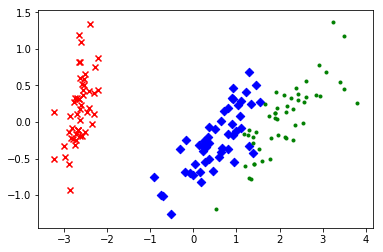

In [7]:
import matplotlib.pyplot as plt
from sklearn import datasets

data = datasets.load_iris()
y = data.target
X = data.data
pca = sklearn.decomposition.PCA(n_components=2)
reduced_X = pca.fit_transform(X)

red_x, red_y = [], []
blue_x, blue_y = [], []
green_x, green_y = [], []
for i in range(len(reduced_X)):
    if y[i] == 0:
        red_x.append(reduced_X[i][0])
        red_y.append(reduced_X[i][1])
    elif y[i] == 1:
        blue_x.append(reduced_X[i][0])
        blue_y.append(reduced_X[i][1])
    else:
        green_x.append(reduced_X[i][0])
        green_y.append(reduced_X[i][1])
plt.scatter(red_x, red_y, c='r', marker='x')
plt.scatter(blue_x, blue_y, c='b', marker='D')
plt.scatter(green_x, green_y, c='g', marker='.')
plt.show()

### 脸部识别

In [ ]:
from os import walk, path
import numpy as np
import mahotas as mh
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

X = []
y = []

#walk()函数内存放的是数据的绝对路径，同时注意斜杠的方向。
for dir_path, dir_names, file_names in walk('./data/att_faces/'):
   for fn in file_names:
        if fn[-3:] == 'pgm':
            image_filename = path.join(dir_path, fn)
            X.append(scale(mh.imread(image_filename, as_grey=True).reshape(10304).astype('float32')))
            y.append(dir_path)
X = np.array(X)

X_train, X_test, y_train, y_test = train_test_split(X, y)
pca = PCA(n_components=150)

X_train_reduced = pca.fit_transform(X_train)
X_test_reduced = pca.transform(X_test)

print('训练集数据的原始维度是：{}'.format(X_train.shape))
print('PCA降维后训练集数据是：{}'.format(X_train_reduced.shape))

classifier = LogisticRegression()
accuracies = cross_val_score(classifier, X_train_reduced, y_train)

print('交叉验证准确率是：{}\n{}'.format(np.mean(accuracies), accuracies))
classifier.fit(X_train_reduced, y_train)
predictions = classifier.predict(X_test_reduced)
print(classification_report(y_test, predictions))